In [41]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import wikipedia as wp

In [99]:
# Function to fetch and process data from a Wikipedia page
def process_wikipedia_page(url):
    html_content = requests.get(url).text
    soup = BeautifulSoup(html_content, "html.parser")
    tables = soup.find_all("table")
    dfs = []
    for table in tables:
        if table.find_all('tr'):
            df = pd.read_html(str(table))[0]
            if 'College' in df.columns:
                df = df[df['College'].notna() & (df['College'] != '') & (df['College'] != '—')]
                dfs.append(df['College'])  # Only selecting the College column
    result_df = pd.concat(dfs, ignore_index=True)
    return result_df

# List of Wikipedia URLs
urls = ["https://en.wikipedia.org/wiki/2024_MLS_SuperDraft",
    "https://en.wikipedia.org/wiki/2023_MLS_SuperDraft",
    "https://en.wikipedia.org/wiki/2022_MLS_SuperDraft",
    "https://en.wikipedia.org/wiki/2021_MLS_SuperDraft",
    "https://en.wikipedia.org/wiki/2020_MLS_SuperDraft",
    "https://en.wikipedia.org/wiki/2019_MLS_SuperDraft",
    "https://en.wikipedia.org/wiki/2018_MLS_SuperDraft",
    "https://en.wikipedia.org/wiki/2017_MLS_SuperDraft",
    "https://en.wikipedia.org/wiki/2016_MLS_SuperDraft",
    "https://en.wikipedia.org/wiki/2015_MLS_SuperDraft",
    "https://en.wikipedia.org/wiki/2014_MLS_SuperDraft"
]

# List to store superdraft data
superdrafts = []

# Process each Wikipedia page and extract the college column
for url in urls:
    result_df = process_wikipedia_page(url)
    superdrafts.append(result_df)

# Concatenate all college columns along the columns (axis=1)
superdrafts_combined = pd.concat(superdrafts, axis=1)

# Rename columns with respective years
column_names = [str(2024 - i) for i in range(len(urls))]  # Create column names from years
superdrafts_combined.columns = column_names

# Display the combined dataframe
superdrafts_combined.style.set_caption("MLS Players -Colleges from 2024 to 2014")
superdrafts_combined

,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014
0,Lipscomb,Clemson,Maryland,Virginia Tech,Clemson,UCLA,Akron,UCLA,Wake Forest,Connecticut,Wake Forest
1,Duke,Duke,Indiana,Wake Forest,Indiana,VCU,Stanford,Syracuse,Georgetown,Oregon State,Virginia
2,Oregon State,New Hampshire,Saint Louis,Clemson,Georgetown,FIU,Pacific,Akron,Georgetown,UCF,Indiana
3,Maryland,Maryland,Duke,Clemson,Syracuse,Charlotte,Michigan,Duke,Stanford,Michigan State,Stanford
4,Washington,UNC Greensboro,Saint Louis,Wake Forest,Virginia,Denver,Wake Forest,Dayton,North Carolina,Notre Dame,NaN
...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,Duke,VCU,Rutgers–Newark,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,Xavier,Milwaukee,Stanford,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,Virginia,Lenoir–Rhyne,Indiana Wesleyan,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,Western Illinois,Rowan,George Washington,NaN,NaN,NaN,NaN


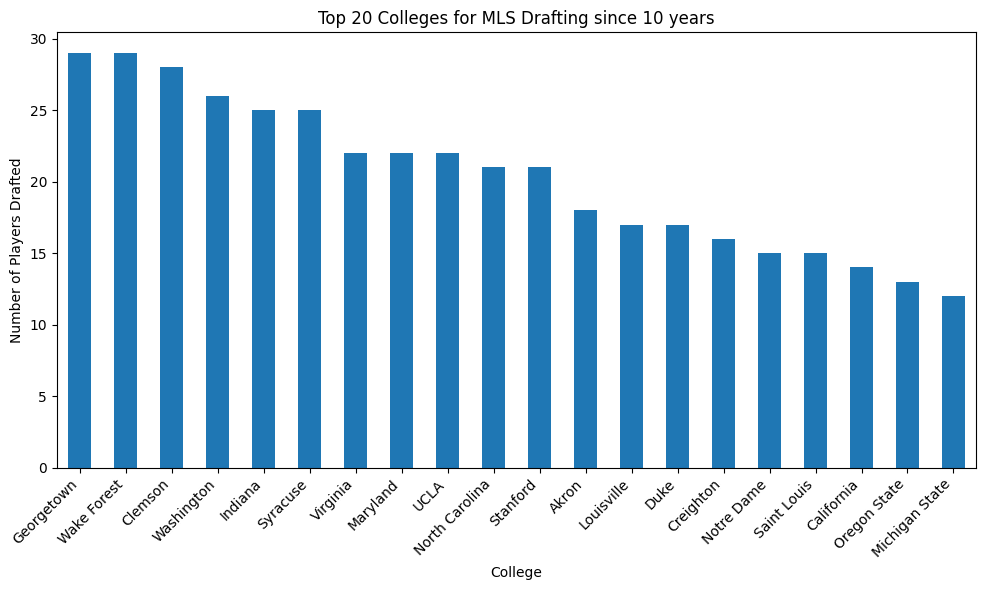

In [101]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique college name
college_counts = superdrafts_combined.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)

# Plot the counts
plt.figure(figsize=(10, 6))
college_counts.head(20).plot(kind='bar')
plt.title('Top 20 Colleges for MLS Drafting since 10 years')
plt.xlabel('College')
plt.ylabel('Number of Players Drafted')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [104]:
college_counts = college_counts.astype(int)
college_drafts_df = college_counts.reset_index()
college_drafts_df.columns = ['College', 'No. of Drafts']

# Display the DataFrame
college_drafts_df

,College,No. of Drafts
0,Georgetown,29
1,Wake Forest,29
2,Clemson,28
3,Washington,26
4,Indiana,25
...,...,...
187,Manhattan,1
188,Lynn,1
189,Loyola-Chicago,1
190,Limestone,1


In [105]:
# Filter the superdrafts_combined dataframe for the year 2024
drafts_2024 = superdrafts_combined['2024']

# Count the occurrences of each unique college name for 2024
college_counts_2024 = drafts_2024.value_counts()

# Get the top 5 colleges for 2024
top_colleges_2024 = college_counts_2024.head(5)

# Display the top 5 colleges for 2024
print("Top 5 Colleges Drafted in 2024:")
top_colleges_2024

Top 5 Colleges Drafted in 2024:


Georgetown      6
Wake Forest     4
Duke            4
Akron           3
Oregon State    3
Name: 2024, dtype: int64

Post Covid drafting

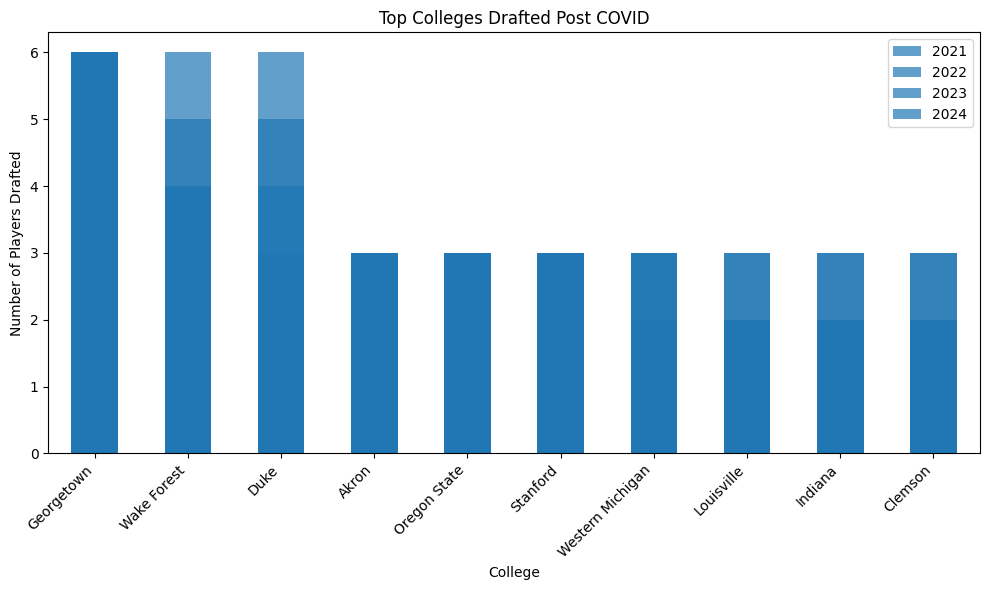

In [108]:

# Years of interest
years_of_interest = ['2021', '2022', '2023', '2024']

# Create a figure and axis for plotting
plt.figure(figsize=(10, 6))

# Iterate over each year
for year in years_of_interest:
    # Filter the superdrafts_combined dataframe for the current year
    drafts_year = superdrafts_combined[year]

    # Count the occurrences of each unique college name for the current year
    college_counts_year = drafts_year.value_counts()

    # Get the top 5 colleges for the current year
    top_colleges_year = college_counts_year.head(10)

    # Plot the top colleges for the current year
    top_colleges_year.plot(kind='bar', alpha=0.7, label=year)

# Set plot title and labels
plt.title('Top Colleges Drafted Post COVID')
plt.xlabel('College')
plt.ylabel('Number of Players Drafted')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
